<a href="https://colab.research.google.com/github/garfield-gray/Optimization/blob/main/Convex/ConvexWarmUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Convex Optimization
## CA#1
### Abbas Mohammadian
### 810898059

## Q1

### A

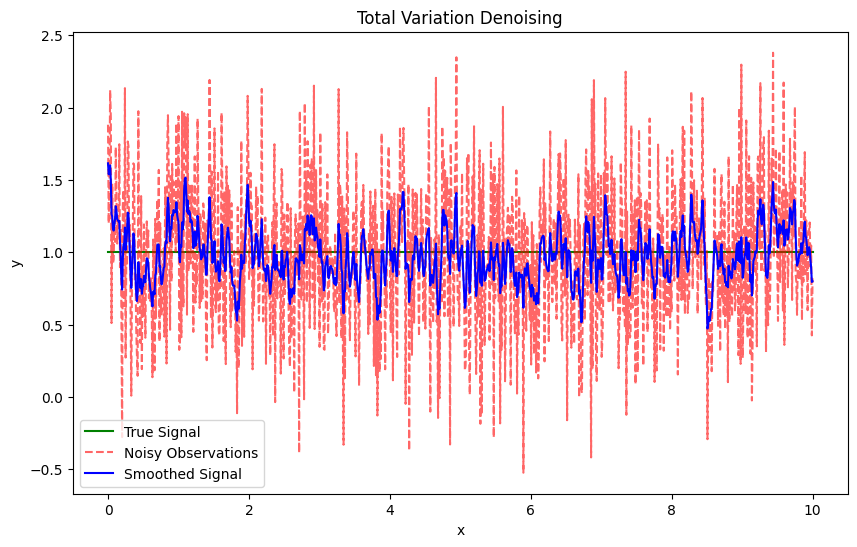

In [ ]:

# Generate synthetic data
np.random.seed(0)
n = 1000
x = np.linspace(0, 10, n)
# y_true = np.sin(x)  # True signal
y_true = np.ones_like(x)  # True signal

noise = np.random.normal(0, 0.5, n)
y_noisy = y_true + noise  # Noisy observations

# Define the optimization variable
y_smooth = cp.Variable(n)

# Define the total variation penalty term
tv_penalty = cp.norm2(y_smooth[1:] - y_smooth[:-1])

# Define the objective function: minimize the total variation penalty + fidelity to the data
lambda_param = 10  # Regularization parameter
objective = cp.Minimize(0.5 * cp.sum_squares(y_smooth - y_noisy) + lambda_param * tv_penalty)

# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='True Signal', color='green')
plt.plot(x, y_noisy, label='Noisy Observations', color='red', linestyle='--', alpha=0.6)
plt.plot(x, y_smooth.value, label='Smoothed Signal', color='blue')
plt.legend()
plt.title('Total Variation Denoising')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### B

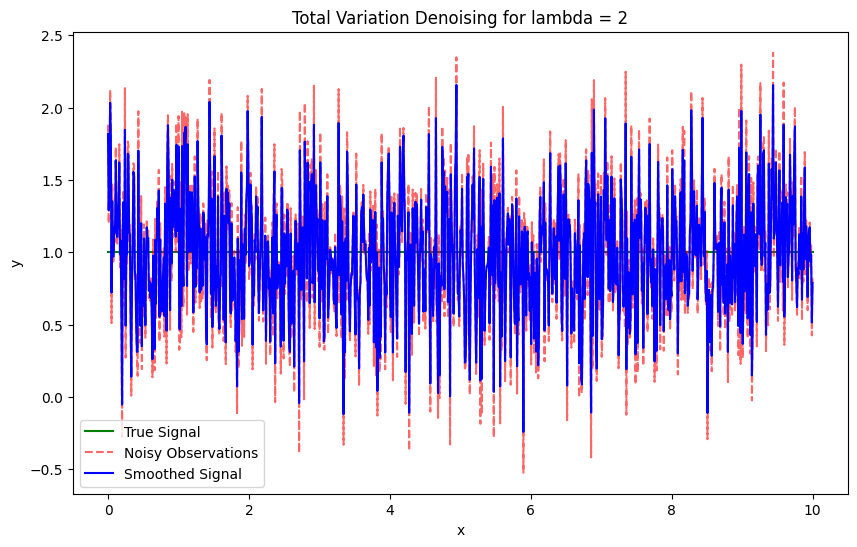

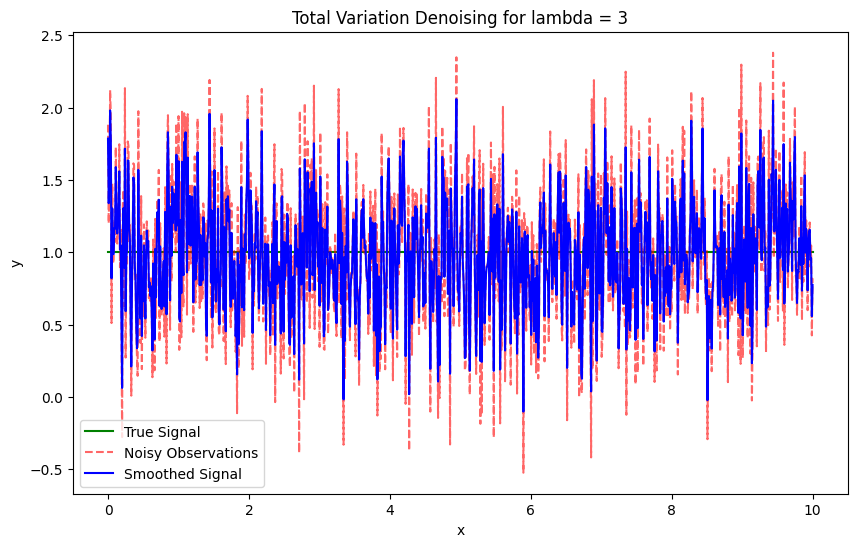

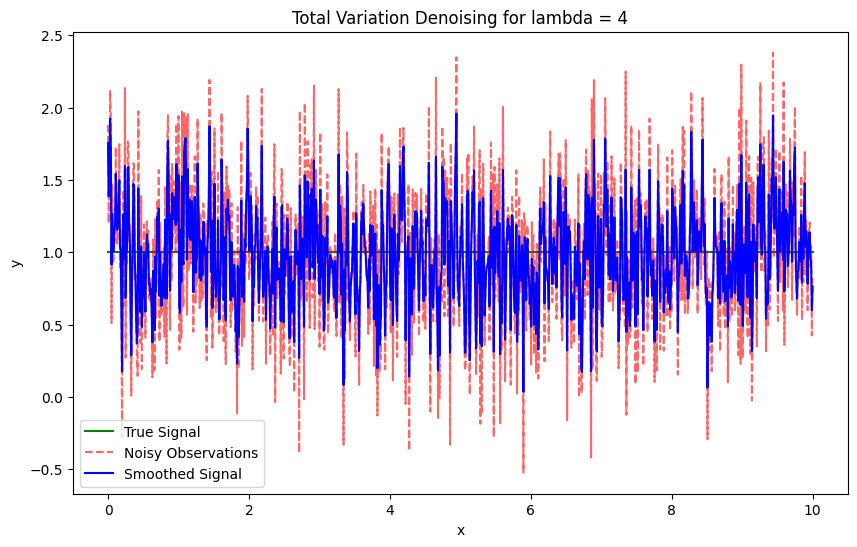

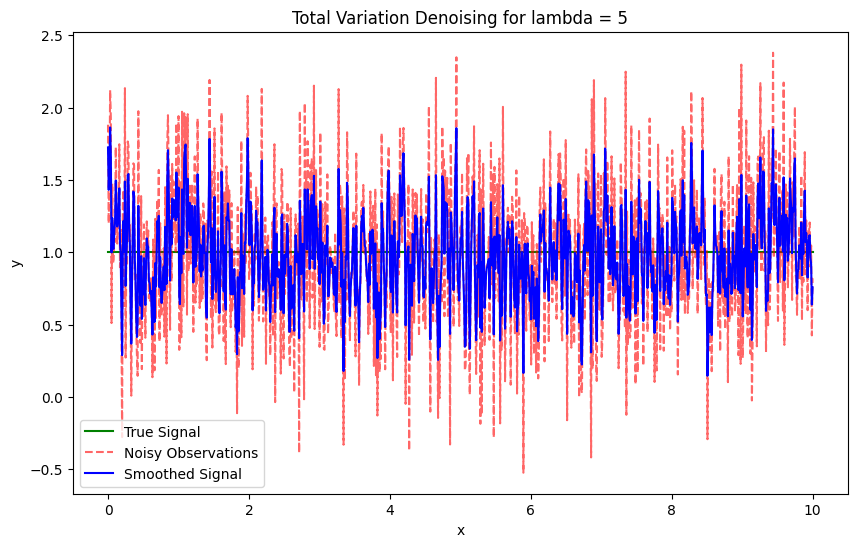

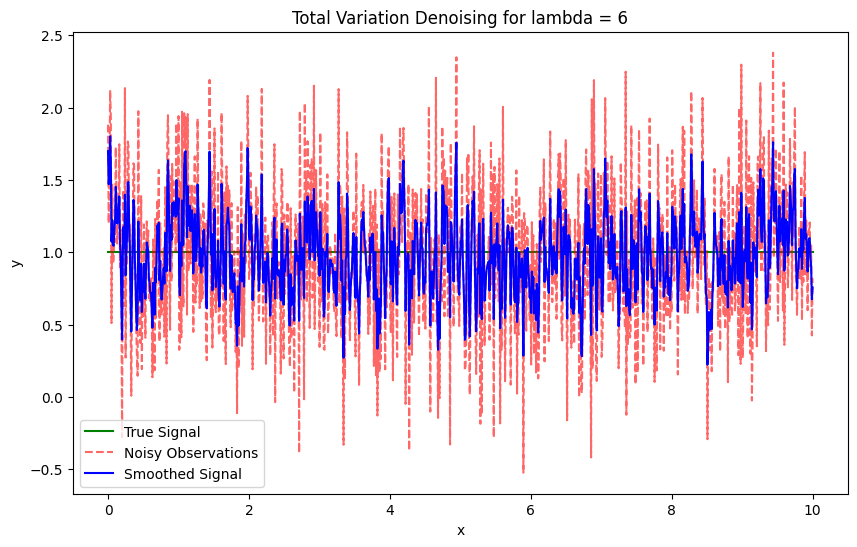

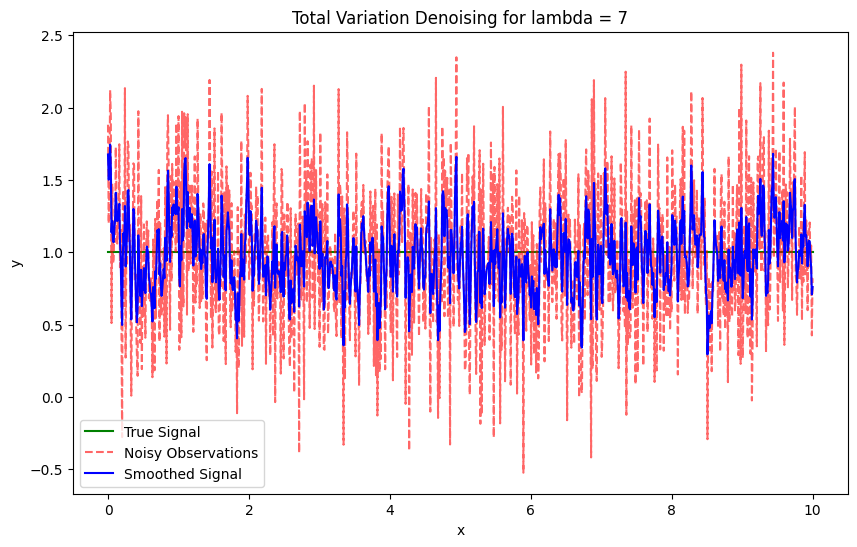

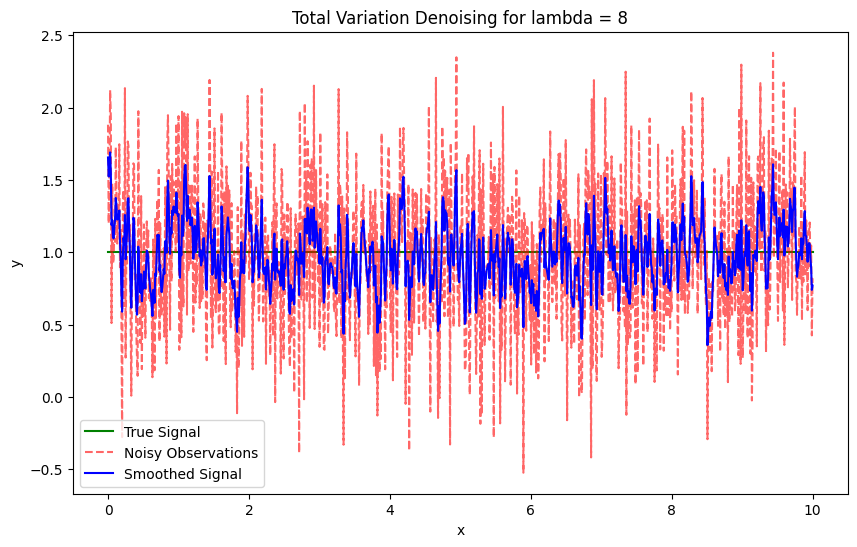

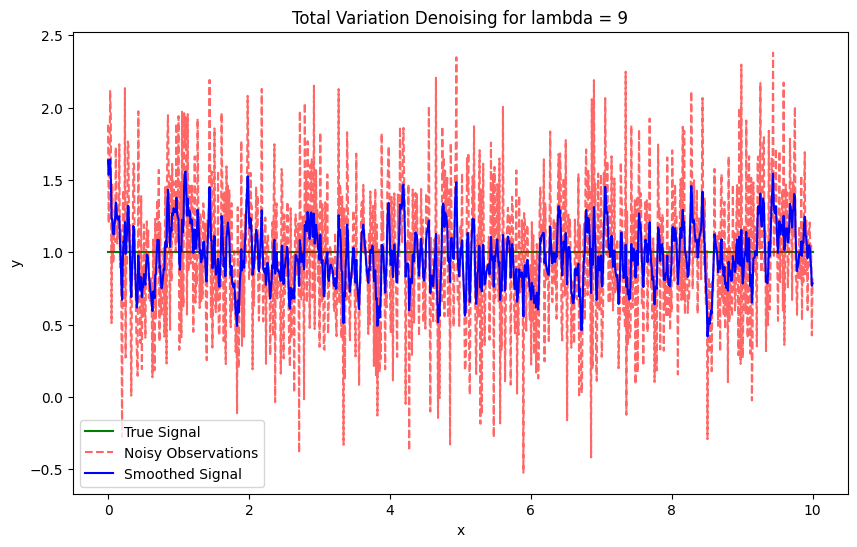

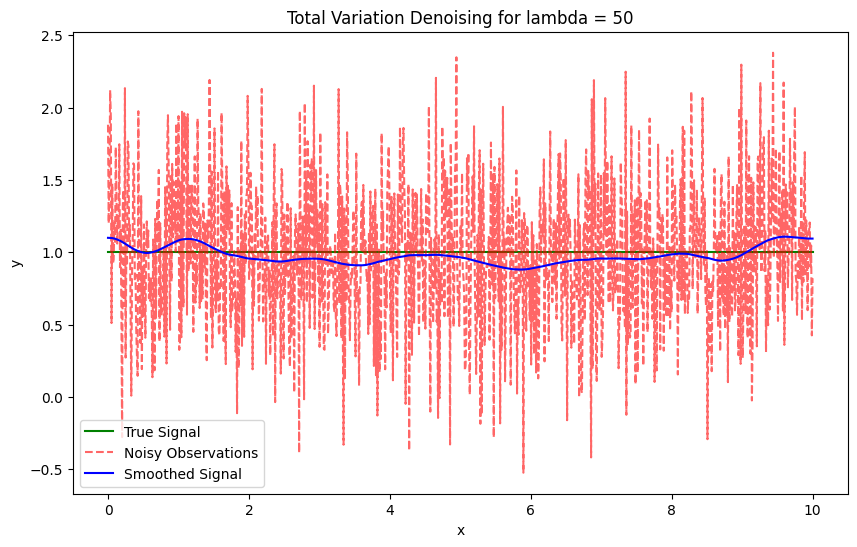

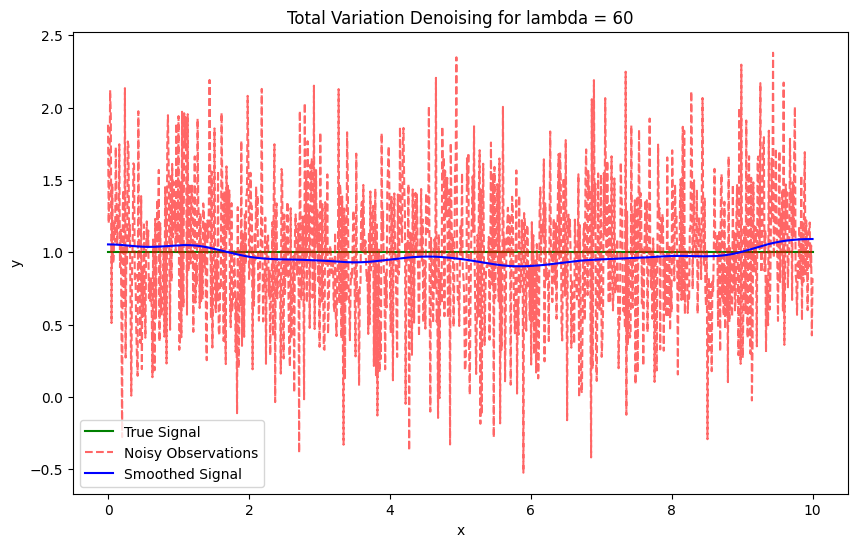

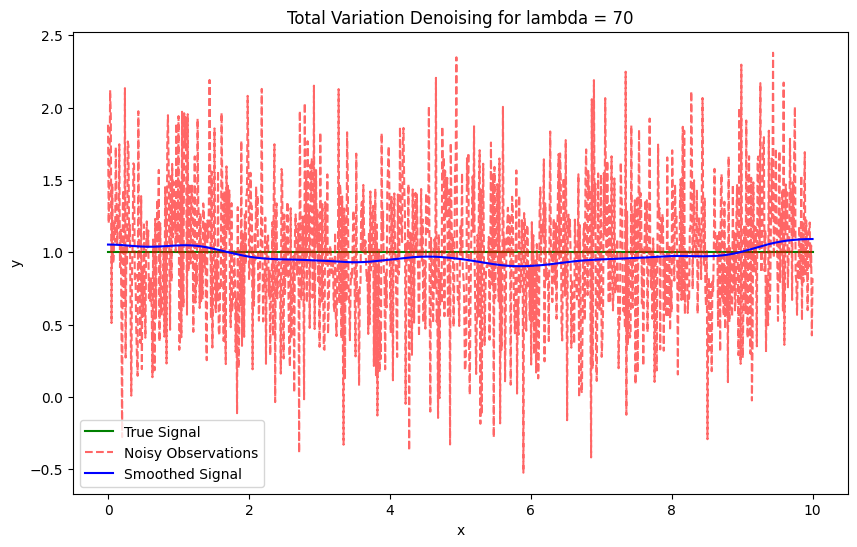

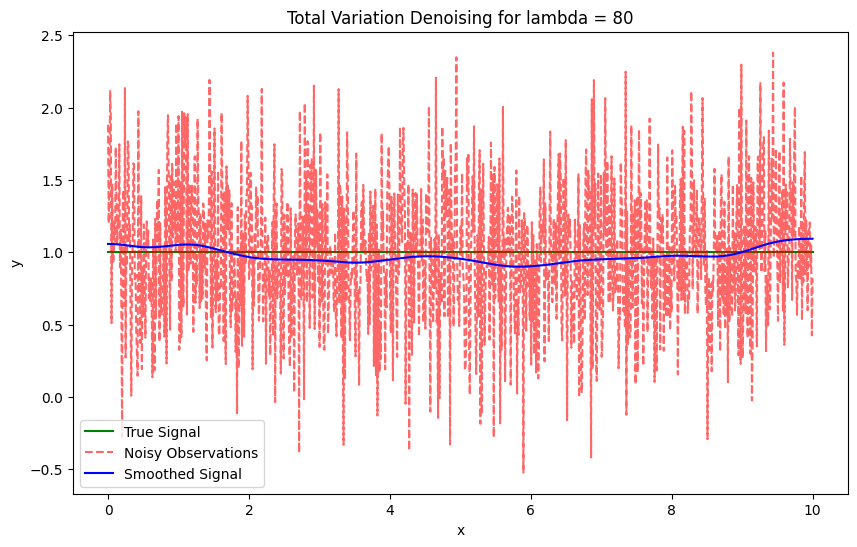

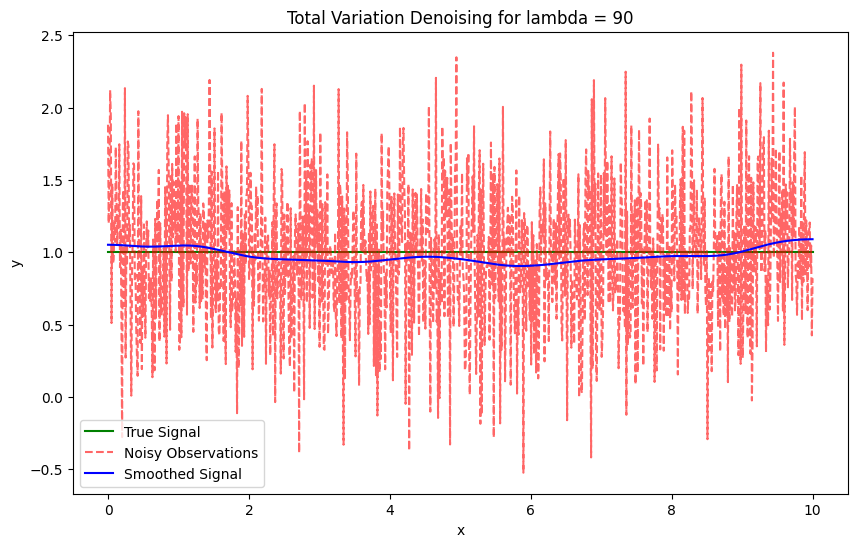

In [ ]:

# Generate synthetic data
np.random.seed(0)
n = 1000
x = np.linspace(0, 10, n)
# y_true = np.sin(x)  # True signal
y_true = np.ones_like(x)  # True signal

noise = np.random.normal(0, 0.5, n)
y_noisy = y_true + noise  # Noisy observations

# Define the optimization variable
y_smooth = cp.Variable(n)

# Define the total variation penalty term
tv_penalty = cp.norm2(y_smooth[1:] - y_smooth[:-1])

for i in [*range(2, 10), *range(50, 100, 10)]:
  # Define the objective function: minimize the total variation penalty + fidelity to the data
  lambda_param = i  # Regularization parameter
  objective = cp.Minimize(0.5 * cp.sum_squares(y_smooth - y_noisy) + lambda_param * tv_penalty)

  # Define the problem and solve it
  problem = cp.Problem(objective)
  problem.solve()

  plt.figure(figsize=(10, 6))
  plt.plot(x, y_true, label='True Signal', color='green')
  plt.plot(x, y_noisy, label='Noisy Observations', color='red', linestyle='--', alpha=0.6)
  plt.plot(x, y_smooth.value, label='Smoothed Signal', color='blue')
  plt.legend()
  plt.title(f'Total Variation Denoising for lambda = {i}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()


## Q2

In [ ]:
def Data_Fitting(x, y, m): #degre is the degre of the polinomial
  v = np.vander(x,m+1)
  return np.linalg.inv(v.T@v)@v.T@y

In [ ]:
def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]

In [ ]:
# testing to see if it works
data1 = np.array(load_data('Data1.txt'))
print(Data_Fitting(data1[:,0], data1[:,1], 3))
print(np.polyfit(data1[:,0], data1[:,1], 3))

FileNotFoundError: [Errno 2] No such file or directory: 'Data1.txt'

In [ ]:
data1 = np.array(load_data('Data1.txt'))
# plt.scatter(data1[:,0], data1[:,1])
# plt.show()
xp = np.linspace(np.min(data1[:,0])-1, np.max(data1[:,0])+1, 2*len(data1[:,0]))
plt.plot(data1[:,0], data1[:,1], '.', xp, np.vander(xp,14)@Data_Fitting(data1[:,0], data1[:,1], 13), '-')

# plt.ylim(-2,2)
plt.show()


## Q3

In [ ]:

import cvxpy as cp

# Define the problem data.
n = 200
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define the optimization variables.
x = cp.Variable(n)

# Define the objective function.
objective = cp.Minimize(cp.norm(A @ x - b, 1))

# Define the constraints.
constraints = []

# Create the problem.
problem = cp.Problem(objective, constraints)

# Solve the problem.
problem.solve()

# Print the solution.
print("The optimal solution is:")
print(x.value)


The optimal solution is:
[ 0.01878879  0.12766112 -0.08962159  0.04445653  0.01307273 -0.00126452
  0.01874962  0.07269571 -0.04300266 -0.13667573  0.03471899 -0.07169278
 -0.1133785  -0.16835695 -0.03011281  0.00120483  0.14653249  0.15922692
  0.01641216 -0.02509164 -0.06950787  0.02052254 -0.03254168 -0.02816658
 -0.0974217  -0.06173682  0.05798875 -0.09237646  0.06160588  0.00754789
  0.00840088  0.0791678  -0.01075501  0.00391488 -0.06979821 -0.15311349
 -0.0005542   0.05873704  0.09807217  0.02548783 -0.11073172  0.05999557
  0.16405293 -0.07172747  0.00703509 -0.16886611 -0.0607304  -0.08138075
 -0.08688388  0.00024881  0.07068595  0.00738893 -0.04027178 -0.02867098
  0.04611982 -0.06398396 -0.04006195 -0.0557736   0.06158309 -0.05952399
  0.07855275  0.04911607 -0.05264412 -0.00721297 -0.06845491 -0.01391409
 -0.10199324 -0.14807694  0.03326078 -0.02851203  0.06769829 -0.04817857
 -0.03954024  0.04392262 -0.07370943  0.07214077 -0.0114483   0.06775369
 -0.02280313  0.04778008 -

In [ ]:
len(x.value)

200